# Importing the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
articles_df = pd.read_csv('data/articles_sep_2020.csv')
customers_df = pd.read_csv('data/Customers_sep_2020.csv')
transactions_df = pd.read_csv('data/transactions_data_sep_2020.csv')

In [83]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,NaN,NaN,ACTIVE,NONE,45.0,4ca377c955c160866d5662b33aa1af44d54d4342fb8bfa...
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1.0,1.0,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...


In [10]:
# rating as the number of purchases for the item
article_trans = pd.DataFrame(transactions_df.groupby(['customer_id', 'article_id']).count()['t_dat']).reset_index().rename(columns={'t_dat': 'article_rating'})
article_trans.head()

,customer_id,article_id,article_rating
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014,1
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003,1
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,685814001,3


In [11]:
article_trans.head()

,customer_id,article_id,article_rating
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014,1
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003,1
4,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,685814001,3


In [12]:
# transactions per item
trans_per_item = pd.DataFrame(transactions_df.groupby(['article_id']).count()['customer_id']).reset_index()
trans_per_item.head()

,article_id,customer_id
0,108775044,10
1,110065011,1
2,111565001,95
3,111586001,250
4,111593001,257


In [13]:
filtered_trans_per_item = trans_per_item[trans_per_item.customer_id >= 20]
popular_articles = filtered_trans_per_item.article_id.tolist()
# transactions per user
trans_per_user = transactions_df.groupby(['customer_id']).count()['article_id'].reset_index(name="num_of_articles")
trans_per_user.head()

,customer_id,num_of_articles
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,2
3,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,3
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,10


In [14]:
filtered_trans_per_user = trans_per_user[trans_per_user.num_of_articles >= 10]
busy_users = filtered_trans_per_user.customer_id.tolist()

# filter transactions to only popular articles and busy users
filtered_trans = article_trans[article_trans.article_id.isin(popular_articles)]
filtered_trans = filtered_trans[filtered_trans.customer_id.isin(busy_users)].reset_index(drop=True)
filtered_trans.head()

,customer_id,article_id,article_rating
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,572998013,1
1,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865929003,1
2,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,909869004,1
3,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134003,1
4,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923134005,1


# Building a User-Ratings matrix

In [15]:
user_ratings_matrix = filtered_trans.pivot_table(index='customer_id', columns='article_id', values='article_rating')
user_ratings_matrix.head()

article_id,111565001,111586001,111593001,111609001,123173001,129085001,130035001,146730001,148033001,153115019,...,946827001,947060001,947509001,947934001,949198001,949551001,949551002,952267001,953763001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00077dbd5c4a4991e092e63893ccf29294a9d5c46e85010e95f2fc10bf9437a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000fa1b80857fa40bf25990bc1b1b65afc63923a8e4b5762db34e4bb46032d29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
number_of_empty_cells = user_ratings_matrix.isnull().values.sum()
total_number_cells = user_ratings_matrix.size
number_of_empty_cells/total_number_cells

0.9984035598369486

# Filling the Missing Values

In [17]:
avg_ratings = user_ratings_matrix.mean(axis=1)
user_ratings_matrix = user_ratings_matrix.sub(avg_ratings, axis=0)
user_ratings_matrix.fillna(0, inplace=True)
user_ratings_matrix.head()

article_id,111565001,111586001,111593001,111609001,123173001,129085001,130035001,146730001,148033001,153115019,...,946827001,947060001,947509001,947934001,949198001,949551001,949551002,952267001,953763001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00077dbd5c4a4991e092e63893ccf29294a9d5c46e85010e95f2fc10bf9437a4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000fa1b80857fa40bf25990bc1b1b65afc63923a8e4b5762db34e4bb46032d29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
article_ratings_matrix = user_ratings_matrix.T
article_ratings_matrix.head(2)

customer_id,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,00077dbd5c4a4991e092e63893ccf29294a9d5c46e85010e95f2fc10bf9437a4,000fa1b80857fa40bf25990bc1b1b65afc63923a8e4b5762db34e4bb46032d29,000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,00125440be6cd148c3599b9c5a2d55f5838c1b0257d35643038c38a60c691fe8,00299609d2f3cd490b2e5939f22c881340ece8a1dd3d63db201b5ae30462e460,0029d61ec30876c8cbaf2b111f1b642a019e43a5e4b960dc23067e5ad126a20d,002faf80a68267264102e08eb4f1f21a59236773e4ab9009c948433fdbad28e7,00357b192b81fc83261a45be87f5f3d59112db7d117513c1e908e6a7021edc35,...,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac55b4c6fb955cc836b1,ffe1791c9c6e3df9aafeebc77cf2cf03dd0123ac76ef90fb37c7b7c3fe6442e7,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b3228600897e4fad2eaa90,fff03ab4ca865dbe1a56bb32a8e41ea23e1b4dfcc4a13fc9c51bb1791712575e,fff187d1386edced8ef49b1df0155241943c9c4cc7abbf7c46bfb5d89b2c09bb,fff2282977442e327b45d8c89afde25617d00124d0f99982410630ac51314356,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171ea27278a18a2d8ca0c7,fff67e0ce3800aab23d16104d8ae13224f80053000dd6e79fb37672fc66b8c5d,fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde2189bdd644f59071dd,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b
article_id,,,,,,,,,,,,,,,,,,,,,
111565001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111586001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarirty

In [95]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(article_ratings_matrix), index=article_ratings_matrix.index, columns=article_ratings_matrix.index)
item_item_sim_matrix.head()

article_id,111565001,111586001,111593001,111609001,123173001,129085001,130035001,146730001,148033001,153115019,...,946827001,947060001,947509001,947934001,949198001,949551001,949551002,952267001,953763001,956217002
article_id,,,,,,,,,,,,,,,,,,,,,
111565001,1.000000,0.000973,0.129556,0.00000,0.000000,0.0,0.0,0.0,0.088173,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
111586001,0.000973,1.000000,-0.018868,0.00000,-0.006904,0.0,0.0,0.0,-0.006713,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
111593001,0.129556,-0.018868,1.000000,0.00000,-0.002300,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.184817,0.0,0.0
111609001,0.000000,0.000000,0.000000,1.00000,0.028060,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
123173001,0.000000,-0.006904,-0.002300,0.02806,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.076748,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Finding similar Articles to recommend

In [96]:
def get_top_similar_product_hierarchies(input_article_id):
    top_10_similar_items = item_item_sim_matrix.loc[input_article_id].sort_values(ascending=False).iloc[1:11].to_frame()
    top_10_similar_items.columns = ['similarity_score']
    return top_10_similar_items

,article_id,similarity_score
0,684062001,0.312074
1,702368001,0.086926
2,573085047,0.086846
3,452618001,0.083962
4,806388012,0.076470
5,873884005,0.066622
6,806241007,0.064673
7,687524001,0.060781
8,806605001,0.051979
9,878502003,0.040217


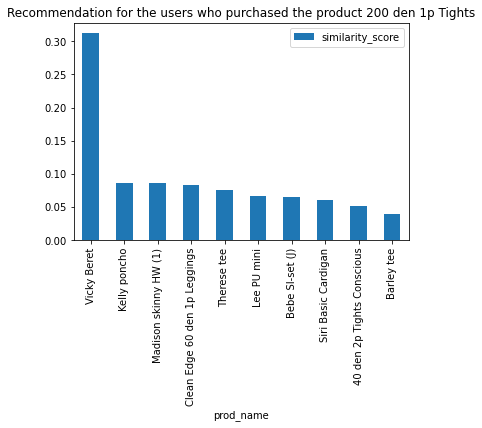

In [97]:
from IPython.display import display
input_article_id = 111609001
input_prod_name = articles_df[articles_df.article_id == input_article_id]['prod_name'].values[0]

recommendation = get_top_similar_product_hierarchies(input_article_id)
display(recommendation.reset_index())

pd.merge(recommendation.reset_index(), articles_df[['article_id', 'prod_name']], on='article_id', how="inner")[['similarity_score', 'prod_name']].sort_values(by="similarity_score", ascending=False) \
    .plot.bar(x="prod_name")
plt.title(f"Recommendation for the users who purchased the product {input_prod_name}")
plt.show()
plt.show()

### Jaccard Index

In [48]:
import operator
def jaccard_index(article, matrix, k=10):
    '''
    input: G-graph, K-number of requested suggested links for each node
    output: .csv file consisting of n lines that have K comma separated values on each line indicating the node index of the
    nodes that are suggested new links that are currently not conncted to that node.
    '''

    similarities = []
    article = list(matrix[matrix.index == article].index)[0]
    other_articles = list(matrix[matrix.index != article].index)
    
    for other_article in other_articles:
        
        # neighbors of node u
        users_u = list(filtered_trans[filtered_trans.article_id==article].customer_id)       
                
        # neighbors of node n
        users_n = list(filtered_trans[filtered_trans.article_id==other_article].customer_id)
        
        # keep nodes that appear in both neighbor lists and get length of remaining nodes
        same_nodes = len(list(set(users_n).intersection(users_u)))

        # we divide the above number with the total number of neighbors
        total_neighbors = len(users_u)

        # append this to the list (common neighbors, node j)
        similarities.append(same_nodes/total_neighbors)

    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(other_articles, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_articles_similarities = index_similarity_sorted[:k]
    articles = [u[0] for u in top_articles_similarities]
    scores = [u[1] for u in top_articles_similarities]
    
    return articles, scores

,similar_articles,scores
0,905518001,0.2
1,903924002,0.2
2,748853001,0.2
3,936990001,0.1
4,936012001,0.1
5,935541001,0.1
6,933989002,0.1
7,931769001,0.1
8,931720001,0.1
9,929744001,0.1


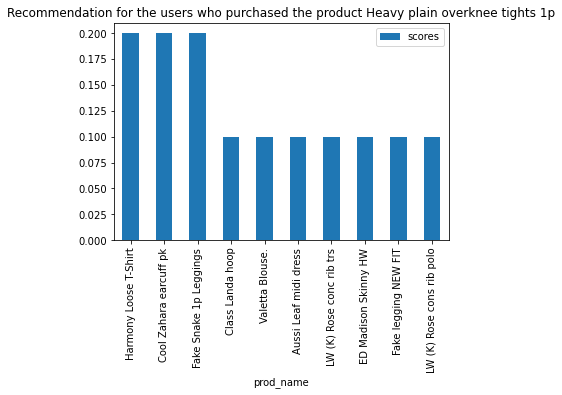

In [94]:
from IPython.display import display

input_article_id = 952267001
prod_name = articles_df[articles_df.article_id == input_article_id]['prod_name'].values[0]


similar_articles, scores = jaccard_index(input_article_id, article_ratings_matrix)
similar_articles_df = pd.DataFrame({'similar_articles':similar_articles, 'scores': scores})
display(similar_articles_df)

pd.merge(similar_articles_df, articles_df[['article_id', 'prod_name']], left_on="similar_articles",right_on='article_id', how="inner")[['scores', 'prod_name']].sort_values(by="scores", ascending=False) \
    .plot.bar(x="prod_name")
plt.title(f"Recommendation for the users who purchased the product {prod_name}")
plt.show()